<a href="https://colab.research.google.com/github/vinhtq-2618/basic-ml-course/blob/lecture09/09_Computer_Vision/HOG_Calculation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import numpy as np
import numpy.linalg as LA
import cv2
import matplotlib.pyplot as plt

np.set_printoptions(linewidth=200, suppress=True, precision=4)

# Load image

In [2]:
!pip install --upgrade gdown
!gdown 1wngj49KqkJ4z6UL70jEsdr2sXTz-TNku

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Attempting uninstall: gdown
    Found existing installation: gdown 4.4.0
    Uninstalling gdown-4.4.0:
      Successfully uninstalled gdown-4.4.0
Downloading...
From: https://drive.google.com/uc?id=1wngj49KqkJ4z6UL70jEsdr2sXTz-TNku
To: /content/test.jpeg
100% 3.92k/3.92k [00:00<00:00, 2.85MB/s]


In [3]:
image = cv2.imread('test.jpeg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

image.shape

(128, 64)

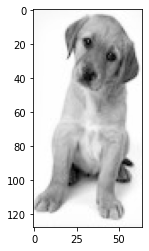

In [4]:
plt.imshow(image, cmap='gray')

# Calculate gradient

In [5]:
def calculate_gradients(img):
    # Kernel for calculating vertical and horizontal gradients
    kernel_v = np.array([[-1], [0], [1]])
    kernel_h = np.array([[-1, 0, 1]])

    # Use cv2.filter2D to quickly calculate gradient
    gradient_v = cv2.filter2D(img, cv2.CV_32F, kernel_v)
    gradient_h = cv2.filter2D(img, cv2.CV_32F, kernel_h)

    return gradient_v, gradient_h

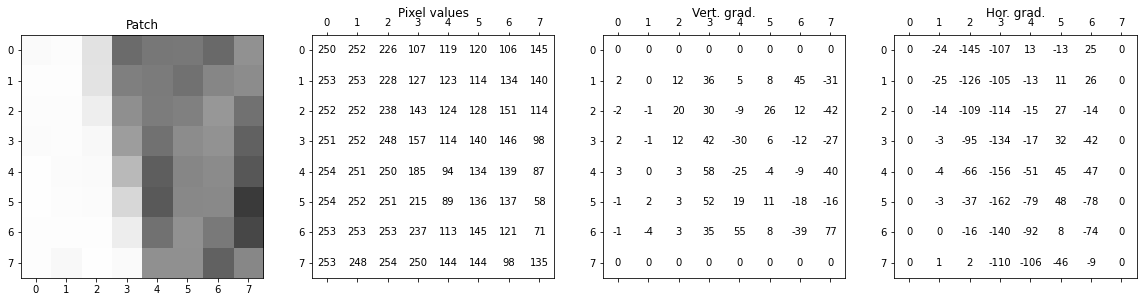

In [6]:
# For visualization, a small patch in the image is extracted and used
sample_patch = image[16:16+8,16:16+8]

gradient_v, gradient_h = calculate_gradients(sample_patch)

fig, ax = plt.subplots(1, 4, figsize=(20, 10))

ax[0].set_title('Patch')
ax[0].imshow(sample_patch, cmap='gray', vmin=0, vmax=255)

for row in range(sample_patch.shape[0]):
    for col in range(sample_patch.shape[1]):
        ax[1].text(col, row, str(int(sample_patch[row][col])), va='center', ha='center')
ax[1].set_title('Pixel values')
ax[1].matshow(np.full((8, 8), 255, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)

for row in range(gradient_v.shape[0]):
    for col in range(gradient_v.shape[1]):
        ax[2].text(col, row, str(int(gradient_v[row][col])), va='center', ha='center')
ax[2].set_title('Vert. grad.')
ax[2].matshow(np.full((8, 8), 255, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)

for row in range(gradient_h.shape[0]):
    for col in range(gradient_h.shape[1]):
        ax[3].text(col, row, str(int(gradient_h[row][col])), va='center', ha='center')
ax[3].set_title('Hor. grad.')
ax[3].matshow(np.full((8, 8), 255, dtype=np.uint8), cmap='gray', vmin=0, vmax=255)

# Calculate magnitude and orientation

In [7]:
def calculate_magnitude_and_orientation(gradient_v, gradient_h):
    magnitude = np.sqrt(np.square(gradient_v) + np.square(gradient_h))

    orientation = np.arctan(np.divide(gradient_v, gradient_h + 0.00001))
    orientation = np.degrees(orientation)
    orientation += 90

    return magnitude, orientation

In [8]:
# Calculate the magnitude and orientation of extracted patch
magnitude, orientation = calculate_magnitude_and_orientation(gradient_v, gradient_h)

In [9]:
magnitude

array([[  0.    ,  24.    , 145.    , 107.    ,  13.    ,  13.    ,  25.    ,   0.    ],
       [  2.    ,  25.    , 126.5701, 111.    ,  13.9284,  13.6015,  51.9711,  31.    ],
       [  2.    ,  14.0357, 110.8197, 117.8813,  17.4929,  37.4833,  18.4391,  42.    ],
       [  2.    ,   3.1623,  95.7549, 140.4279,  34.4819,  32.5576,  43.6807,  27.    ],
       [  3.    ,   4.    ,  66.0681, 166.4332,  56.7979,  45.1774,  47.8539,  40.    ],
       [  1.    ,   3.6056,  37.1214, 170.1411,  81.2527,  49.2443,  80.05  ,  16.    ],
       [  1.    ,   4.    ,  16.2788, 144.3087, 107.1868,  11.3137,  83.6481,  77.    ],
       [  0.    ,   1.    ,   2.    , 110.    , 106.    ,  46.    ,   9.    ,   0.    ]], dtype=float32)

In [10]:
orientation

array([[ 90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ],
       [179.9997,  90.    ,  84.5597,  71.0754,  68.9625, 126.0273, 149.9816,   0.    ],
       [  0.0003,  94.0856,  79.6027,  75.2564, 120.9638, 133.9191,  49.3987,   0.    ],
       [179.9997, 108.435 ,  82.8008,  72.5973, 150.4612, 100.6197, 105.9454,   0.    ],
       [179.9998,  90.    ,  87.3974,  69.6051, 116.1139,  84.9204, 100.8403,   0.    ],
       [  0.0006,  56.3098,  85.3645,  72.204 ,  76.4768, 102.9074, 102.9946,   0.    ],
       [  0.0006,   0.0001,  79.3803,  75.9638,  59.1279, 135.    , 117.7904, 180.    ],
       [ 90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ,  90.    ]], dtype=float32)

In [11]:
# Calculate magnitude and orientation for whole image
gradient_v, gradient_h = calculate_gradients(image)
magnitude, orientation = calculate_magnitude_and_orientation(gradient_v, gradient_h)

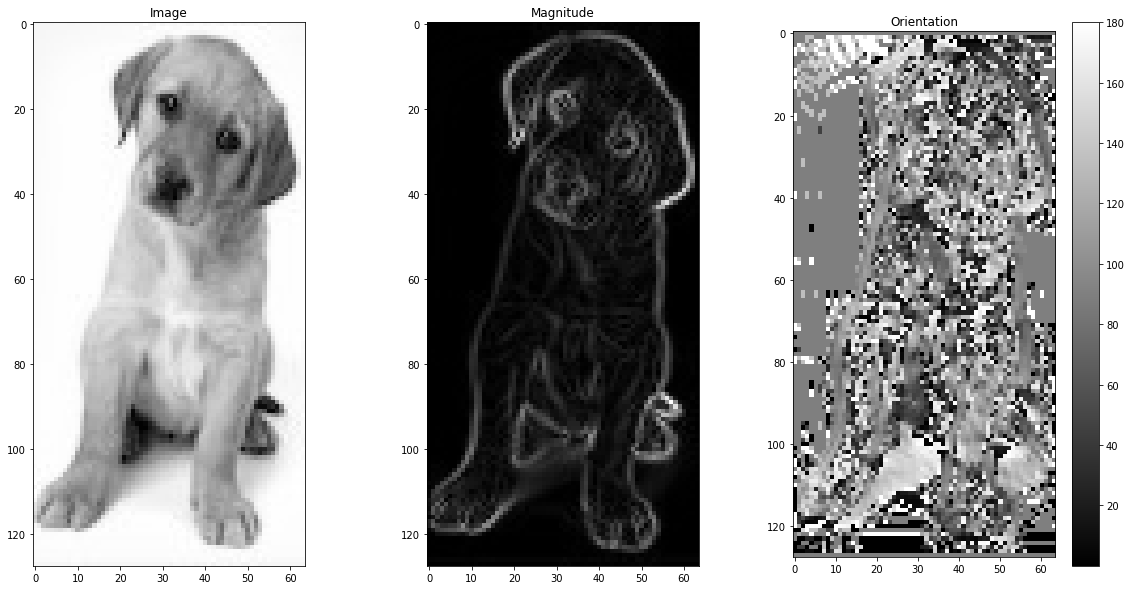

In [12]:
fig, ax = plt.subplots(1, 3, figsize=(20, 10))

ax[0].set_title('Image')
ax[0].imshow(image, cmap='gray', vmin=0, vmax=255)

ax[1].set_title('Magnitude')
ax[1].imshow(magnitude, cmap='gray')

ax[2].set_title('Orientation')
im = ax[2].imshow(orientation, cmap='gray')
plt.colorbar(im, ax=ax[2])

# Calculate gradient histogram

For histogram calculation, use [`np.histogram`](https://numpy.org/doc/stable/reference/generated/numpy.histogram.html).

In [13]:
def calculate_histogram(img):
    # Calculate vertical and horizontal gradients
    gradient_v, gradient_h = calculate_gradients(img)

    # Calculate magnitude and orientation
    magnitude, orientation = calculate_magnitude_and_orientation(gradient_v, gradient_h)

    cell_size = 8
    num_cell_x = img.shape[1] // cell_size # 8
    num_cell_y = img.shape[0] // cell_size # 16
    bins = 9
    histogram_tensor = np.zeros((num_cell_y, num_cell_x, bins))

    for cell_x_idx in range(num_cell_x):
        for cell_y_idx in range(num_cell_y):
            x_start = cell_x_idx * cell_size
            y_start = cell_y_idx * cell_size
            mag = magnitude[y_start:y_start+cell_size, x_start:x_start+cell_size]
            ori = orientation[y_start:y_start+cell_size, x_start:x_start+cell_size]

            hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag)  # Returns 1-D vector
            histogram_tensor[cell_y_idx, cell_x_idx, :] = hist
    return histogram_tensor

In [14]:
image_histogram = calculate_histogram(image)
image_histogram.shape

(16, 8, 9)

<BarContainer object of 9 artists>

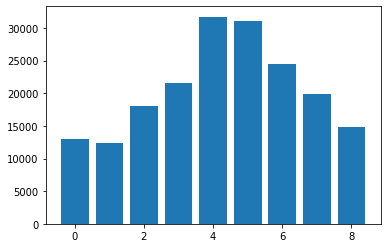

In [15]:
plt.bar(x=np.arange(9), height=np.sum(image_histogram, axis=(0, 1)), align='center', width=0.8)

# Histogram Normalization

In [16]:
def normalize(histogram):
    num_cell_y, num_cell_x, bins = histogram.shape
    block_size = 2
    redundant_cell = block_size - 1
    feature_tensor = np.zeros((num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins))
    for block_x in range(num_cell_x - redundant_cell):
        for block_y in range(num_cell_y - redundant_cell):
            v = histogram[block_y:block_y+block_size, block_x:block_x+block_size, :].flatten() + 1e-8
            feature_tensor[block_y, block_x, :] = v / LA.norm(v, 2)

    return feature_tensor

In [17]:
histogram = normalize(image_histogram)

In [18]:
histogram.shape

(15, 7, 36)

In [19]:
flatten_histogram = histogram.flatten()
flatten_histogram.shape

(3780,)

In [20]:
def get_HOG_histogram(img):
    # Kernel for calculating vertical and horizontal gradients
    kernel_v = np.array([[-1], [0], [1]])
    kernel_h = np.array([[-1, 0, 1]])

    # Use cv2.filter2D to quickly calculate gradient
    gradient_v = cv2.filter2D(img, cv2.CV_32F, kernel_v)
    gradient_h = cv2.filter2D(img, cv2.CV_32F, kernel_h)

    # Calculate magnitude and orientation
    magnitude = np.sqrt(np.square(gradient_v) + np.square(gradient_h))
    orientation = np.arctan(np.divide(gradient_v, gradient_h + 0.00001))
    orientation = np.degrees(orientation)
    orientation += 90

    # Calculate histogram
    cell_size = 8
    num_cell_x = img.shape[1] // cell_size
    num_cell_y = img.shape[0] // cell_size
    bins = 9
    histogram_tensor = np.zeros((num_cell_y, num_cell_x, bins))

    for cell_x_idx in range(num_cell_x):
        for cell_y_idx in range(num_cell_y):
            x_start = cell_x_idx * cell_size
            y_start = cell_y_idx * cell_size
            mag = magnitude[y_start:y_start+cell_size, x_start:x_start+cell_size]
            ori = orientation[y_start:y_start+cell_size, x_start:x_start+cell_size]

            hist, _ = np.histogram(ori, bins=bins, range=(0, 180), weights=mag)
            histogram_tensor[cell_y_idx, cell_x_idx, :] = hist

    block_size = 2
    redundant_cell = block_size - 1
    feature_tensor = np.zeros((num_cell_y-redundant_cell, num_cell_x-redundant_cell, block_size*block_size*bins))
    for block_x in range(num_cell_x - redundant_cell):
        for block_y in range(num_cell_y - redundant_cell):
            v = histogram_tensor[block_y:block_y+block_size, block_x:block_x+block_size, :].flatten() + 1e-8
            feature_tensor[block_y, block_x, :] = v / LA.norm(v, 2)

    return feature_tensor.flatten()